Deep Learning
=============

Assignment 2
------------

Previously in `1_notmnist.ipynb`, we created a pickle with formatted datasets for training, development and testing on the [notMNIST dataset](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html).

The goal of this assignment is to progressively train deeper and more accurate models using TensorFlow.

In [23]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
# from __future__ import print_function
import numpy as np
# import tensorflow as tf
from six.moves import cPickle as pickle
# from six.moves import range
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, Dropout
from keras.regularizers import l2

# For sake of annoying error
import theano
theano.config.compute_test_value = 'ignore'

First reload the data we generated in `1_notmnist.ipynb`.

In [4]:
pickle_file = 'notMNIST.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    train_dataset = save['train_dataset']
    train_labels = save['train_labels']
    valid_dataset = save['valid_dataset']
    valid_labels = save['valid_labels']
    test_dataset = save['test_dataset']
    test_labels = save['test_labels']
    del save  # hint to help gc free up memory
    print('Training set', train_dataset.shape, train_labels.shape)
    print('Validation set', valid_dataset.shape, valid_labels.shape)
    print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


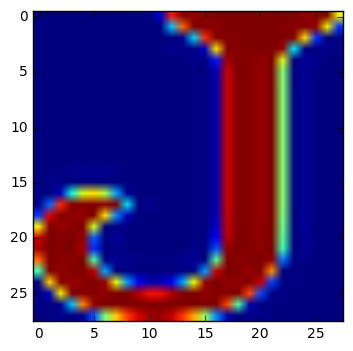

In [9]:
plt.imshow(train_dataset[1])


Reformat into a shape that's more adapted to the models we're going to train:
- data as a flat matrix,
- labels as float 1-hot encodings.

In [10]:
image_size = 28
num_labels = 10

def reformat(dataset, labels):
    dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
    # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
    labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return dataset, labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 784) (200000, 10)
Validation set (10000, 784) (10000, 10)
Test set (10000, 784) (10000, 10)


In [11]:
train_dataset.shape

(200000, 784)

In [13]:
train_labels[:10]

array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

## sklearn part

In [30]:
from sklearn.linear_model import LogisticRegression
train_len = 5000
train_sample = train_dataset[0:train_len,:]
train_sample_labels = train_labels[0:train_len]
train_sample_labels = np.argmax(train_sample_labels,axis=1)

logreg = LogisticRegression()
logreg.fit(train_sample, train_sample_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
Z = logreg.predict(train_sample)
sum(Z==train_sample_labels)/len(train_sample_labels)

0.9506

In [33]:
Z = logreg.predict(test_dataset)
sum(Z==np.argmax(test_labels,axis=1))/len(test_labels)

0.8518

## Deep Learning part

In [18]:
model = Sequential()

model.add(Dense(input_dim=train_dataset.shape[1],output_dim=10,activation="softmax"))
model.compile(optimizer='adagrad', loss='categorical_crossentropy',
              metrics=['accuracy'])
# model.fit(train_dataset,train_labels)

In [19]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 10)            7850        dense_input_1[0][0]              
Total params: 7850
____________________________________________________________________________________________________


In [21]:
train_dataset.shape

(200000, 784)

In [25]:
model.fit(train_dataset,train_labels,validation_data=(valid_dataset,valid_labels),batch_size=4096,nb_epoch=10,verbose=1)

Train on 200000 samples, validate on 10000 samples
Epoch 1/10
200000/200000 [==============================] - 0s - loss: 0.6895 - acc: 0.8194 - val_loss: 0.6910 - val_acc: 0.8199
Epoch 2/10
200000/200000 [==============================] - 0s - loss: 0.6779 - acc: 0.8223 - val_loss: 0.6819 - val_acc: 0.8228
Epoch 3/10
200000/200000 [==============================] - 0s - loss: 0.6706 - acc: 0.8239 - val_loss: 0.6763 - val_acc: 0.8244
Epoch 4/10
200000/200000 [==============================] - 0s - loss: 0.6653 - acc: 0.8252 - val_loss: 0.6724 - val_acc: 0.8255
Epoch 5/10
200000/200000 [==============================] - 0s - loss: 0.6613 - acc: 0.8262 - val_loss: 0.6692 - val_acc: 0.8265
Epoch 6/10
200000/200000 [==============================] - 0s - loss: 0.6581 - acc: 0.8272 - val_loss: 0.6668 - val_acc: 0.8271
Epoch 7/10
200000/200000 [==============================] - 0s - loss: 0.6554 - acc: 0.8280 - val_loss: 0.6645 - val_acc: 0.8270
Epoch 8/10
200000/200000 [====================

In [36]:
Z = np.argmax(model.predict(test_dataset),axis=1)
sum(Z==np.argmax(test_labels,axis=1))/len(test_labels)

0.89490000000000003

---
Problem
-------

Turn the logistic regression example with SGD into a 1-hidden layer neural network with rectified linear units [nn.relu()](https://www.tensorflow.org/versions/r0.7/api_docs/python/nn.html#relu) and 1024 hidden nodes. This model should improve your validation / test accuracy.

---

In [41]:
model = Sequential()

model.add(Dense(input_dim=train_dataset.shape[1],output_dim=1024,activation="relu"))
model.add(Dense(output_dim=10,activation="softmax"))
model.compile(optimizer='adagrad', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_4 (Dense)                  (None, 1024)          803840      dense_input_3[0][0]              
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 10)            10250       dense_4[0][0]                    
Total params: 814090
____________________________________________________________________________________________________


In [ ]:
model.fit(train_dataset,train_labels,validation_data=(valid_dataset,valid_labels),batch_size=128,nb_epoch=2,verbose=1)

Train on 200000 samples, validate on 10000 samples
Epoch 1/2
200000/200000 [==============================] - 16s - loss: 0.4710 - acc: 0.8651 - val_loss: 0.4142 - val_acc: 0.8753
Epoch 2/2
103040/200000 [==============>...............] - ETA: 7s - loss: 0.3664 - acc: 0.8934